In [1]:
import sys

In [2]:
sys.path.append('..')

In [3]:
from nbhd import data

Initializing database connection...
Database connected!


In [4]:
db = data.Base()

In [5]:
pixels = db.select('pixels')

In [6]:
p = pixels.iloc[100].geometry

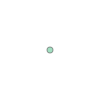

In [7]:
p.centroid

In [8]:
df = db.knn('openroads', 'openuprn', p.centroid.buffer(10000))

In [10]:
def get_nearest_nodes_translator(self, polygon, within):
    nearest_nodes = self.nearest_same('roadnodes', polygon.buffer(1), within)
    g = nx.from_pandas_edgelist(nearest_nodes, 'id_1', 'id_2', True)
    subgraphs =[g.subgraph(c) for c in nx.connected_components(g)]
    translator = {n: list(g.nodes)[0] for g in subgraphs for n in g.nodes}
    return translator

In [11]:
db.knn?

Signature:
db.knn(
    table1,
    table2,
    polygon,
    k=1,
    max_distance=None,
    spatial_query='intersects',
)
Docstring:
Find k nearest-neighbours for results from table1 and table2 
as returned by given spatial_query for given polygon.
File:      ~/code/nbhd/data.py
Type:      method
